# Embedded ML - Lab 2.3: TensorFlow Lite Micro

Tensor Flow Lite Micro (TFLM) is a library that aims to run ML models efficiently on embedded systems. It's a C++ library that provides a version of the TensorFlow Lite interpreter that supports less types of operations and uses less memory. The library also provides helper functions for data pre- and post-processing.

In [25]:
# To run this notebook, locally as a jupyter notebook, you need to install thhe proper packages.
# follow the instructions below to set up your environment.


# 1. Crea un entorno virtual usando conda o venv
#    Por ejemplo, usando conda:
#        conda create -n [myenv] python=3.8
#        conda activate [myenv]
#    O usando venv:
#        python3 -m venv [myenv]
#        source [myenv]/bin/activate
#
# 2. Activa el entorno virtual
# 3. Instala los paquetes requeridos usando pip
# 4. Ejecuta el notebook


# Instala los paquetes requeridos:
%pip install numpy -q
%pip install pandas -q
%pip install matplotlib -q
%pip install tensorflow -q
%pip install scikit-learn -q
%pip install tensorflow-hub -q
%pip install tensorflow-datasets -q
%pip install tensorflow-estimator -q
%pip install roboflow -q
%pip install tabulate -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Learning outcomes


* Explain the basic concepts associated with TFLM
* Use the API to implement the TFLM workflow for an embedded application
* Execute TFLM code on a microcontroller-based embedded system

### TensorFlow Lite Micro workflow

TFLM's high-level workflow is rather simple:
* Generate a small TensorFlow model that can fit your target device and contains supported operations.
* Convert to a TensorFlow Lite model using the TensorFlow Lite converter, applying quantization if required.
* Convert to a C byte array using standard tools and stored it in the read-only program memory on device.
* Run inference on device using the TFLM C++ library and process the results.

### Hello World and Hello Human

After installing the Arduino IDE and the board files, you should install the Harvard_TinyMLx library that contains the TensorFlow Lite Micro and other resources and examples to build ML apps with Arduino and TFLM. Later on, depending on the application you want to build and the specific hardware to be used, you should install the propper peripheral drivers for communication, sensing and actuating.



*   Install Arduino IDE 2 from: https://downloads.arduino.cc/arduino-ide/arduino-ide_2.3.2_Linux_64bit.AppImage
*   From the boards manager install: Arduino Mbed OS Nano boards
*   Allow the linux user to access serial port: `sudo usermod -a -G dialout \<username\>` (reboot afterwards)
*   From the library manager install: Harvard_TinyMLx




Now open the **Hello World** example from the Harvard_TinyMLx library File->Examples->Harvard_TinyMLx in Arduino IDE (also available in [this repo](https://github.com/tinyMLx/arduino-library/tree/main/examples/hello_world)), compile it and run it on the microcontroller board. It is an ML model to predict a sine wave that is used to dim on and off an LED. The Arduino IDE serial monitor should also show interger numbers up and down trying to model a sine wave. This is a test app to make sure that the basic HW and SW elements, including TFLM, are working.

Inspect the code to make sure you identify and understand the main parts of the workflow.

Running on-device inference using the TFLM C++ library usually involves:

* Include the library headers
* Include the model header
* Load a model
* Instantiate operations resolver
* Allocate memory
* Instantiate interpreter
* Read and pre-process input data
* Provide inputs to the allocated tensors
* Run inference
* Get results from the output tensors
* Take action based on outputs

After you have succesfully run the Hello World example, move on to running the **Person Detection** example from the same library. Explore the code in detail to understand how to handle the **camera**.

### TinyML application development

ML applications that run on embeded systems with very limited resources are often called TinyML. In this lab the goal is to develop a simple TinyML application that uses computer vision up to its deployment on the target embedded device: **Arduino Nano 33 BLE.**

Follow these steps in order to develop your TinyML application:

1. Select two visual objects that are radically different and  assemble a dataset that contains at least hundreds or thousands of examples. You can create the images yourslef or extract them from a public database and apply data augmentation.

2. Design and train a model to classify between the two chosen objects. You can build a dense or CNN model from scratch, or use transfer learning, but you should always keep in mind the very limited memory resources of the target device as well as the image properties of the embedded camera.

3.   Export the trained model to a file and convert it to a C header by running the following linux command: `xxd -i converted_model.tflite > converted_model_data.h`

4.   Develop an Arduino code based on the Hello World and Person Detection examples, to detect whether any of the two objects are present on the camera view. Indicate the result through the RGB LED.

Include in your notebook submission both the code you developed to build the model as well as the C++ codes for the MCU.

In [ ]:
# Step 1: Download the dataset from Roboflow 

from roboflow import Roboflow


rf = Roboflow(api_key="w5hJLcBvvd3Y3rBjxkkU")
project = rf.workspace("eml-pb5ag").project("rock-paper-scissors-vwkqp")
version = project.version(3)
dataset = version.download("folder")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-3 in folder:: 100%|██████████| 2939/2939 [00:00<00:00, 10660.82it/s]


In [ ]:
# Step 2: Load the dataset and prepare the data generators

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 96
BATCH_SIZE = 16

# Define the directories for training, validation, and testing
train_dir = dataset.location + "/train"
valid_dir = dataset.location + "/valid"
test_dir = dataset.location + "/test"

# Create ImageDataGenerators for training, validation, and testing
train_gen = ImageDataGenerator(rescale=1./255,)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Create validation and test data generators
valid_data = valid_gen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

# Create test data generator
test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE
)




Found 2520 images belonging to 3 classes.


Found 372 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [ ]:
# Step 3: Build and compile the model


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),  
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


# Train the model
EPOCHS = 15
model.fit(train_data, validation_data=valid_data, epochs=EPOCHS)

# save the model
model.save("rock_paper_scissors_model.keras")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 94, 94, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 47, 47, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       123,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,699 (487.11 KB)

 Trainable params: 124,699 (487.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5961 - loss: 0.8704 - val_accuracy: 0.6989 - val_loss: 0.5994
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9866 - loss: 0.0754 - val_accuracy: 0.7554 - val_loss: 0.4946
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9972 - loss: 0.0199 - val_accuracy: 0.8683 - val_loss: 0.3902
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9975 - loss: 0.0094 - val_accuracy: 0.8306 - val_loss: 0.4654
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8333 - val_loss: 0.4774
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8226 - val_loss: 0.5351
Epoch 7/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8145 - val_loss: 0.5667
Epoch 8/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 9.5063e-04 - val_

In [ ]:
# Step 4: Convert the model to tflite int8 format

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]


# Set representative dataset for quantization
# Define a representative dataset generator for post-training quantization.
# This function yields batches of input data in the correct shape and type,
# allowing the TFLite converter to calibrate the quantization ranges.
def representative_dataset_gen():
    for _ in range(100):
        # Get a batch of images from the training data generator
        data, _ = next(train_data)
        # Yield a single image as a list of tensors, as required by TFLite
        yield [tf.convert_to_tensor(data[0:1], dtype=tf.float32)]


# Assign the representative dataset generator to the converter
converter.representative_dataset = representative_dataset_gen

# Convert the model to TFLite format
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

converter.inference_input_type = tf.int8  # Set input type to int8
converter.inference_output_type = tf.int8  # Set output type to int8

# Convert the model to TFLite format with optimizations
tflite_model = converter.convert()

# Save the converted TFLite model to a file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

# Convert the model to C header file
!xxd -i model.tflite > model.cpp 



INFO:tensorflow:Assets written to: /tmp/tmppemnwcn6/assets


INFO:tensorflow:Assets written to: /tmp/tmppemnwcn6/assets


Saved artifact at '/tmp/tmppemnwcn6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name='keras_tensor_40')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134095406658576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406658768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406658000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406660112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406661456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406650704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406650128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134095406660496: TensorSpec(shape=(), dtype=tf.resource, name=None)


Statistics for quantized inputs were expected, but not specified; continuing anyway.
W0000 00:00:1748995353.620899   20523 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748995353.620921   20523 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-03 19:02:33.621147: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppemnwcn6
2025-06-03 19:02:33.621764: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-03 19:02:33.621770: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmppemnwcn6
2025-06-03 19:02:33.627894: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-03 19:02:33.654452: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmppemnwcn6
2025-06-03 19:02:33.664041: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status

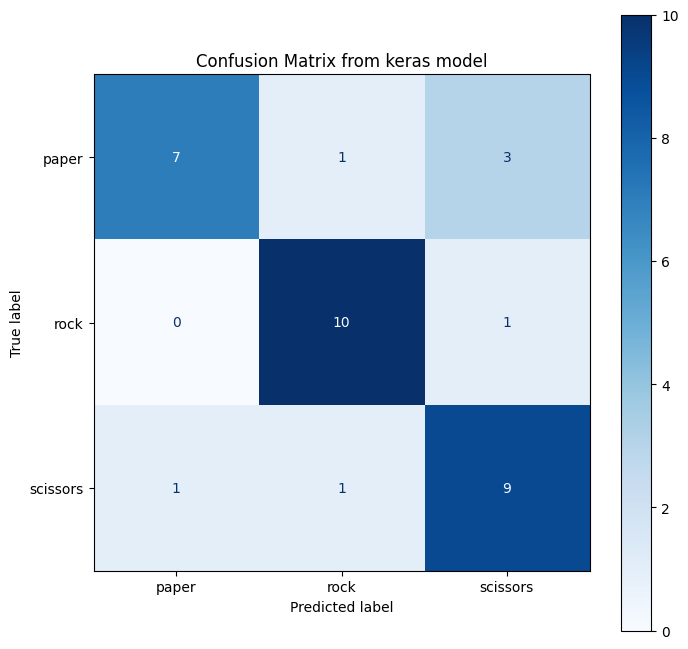

Classification Report:
[[ 7  1  3]
 [ 0 10  1]
 [ 1  1  9]]
classification_report:
              precision    recall  f1-score   support

       paper       0.88      0.64      0.74        11
        rock       0.83      0.91      0.87        11
    scissors       0.69      0.82      0.75        11

    accuracy                           0.79        33
   macro avg       0.80      0.79      0.79        33
weighted avg       0.80      0.79      0.79        33



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Reset the test data generator to ensure it starts from the beginning
test_data.reset()

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# predict on the test data
for i in range(len(test_data)):
    # Get a batch of images and labels
    x_batch, y_batch = test_data[i]
    preds = model.predict(x_batch, verbose=0)       

    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

class_names = list(test_data.class_indices.keys())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(class_names)))


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix from keras model')
plt.show()

# Print the confusion matrix
print("Classification Report:")
print(cm)

# Print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("classification_report:")
print(report)


Input scale: 0.003921568859368563 Input zero point: -128
Output scale: 0.00390625 Output zero point: -128


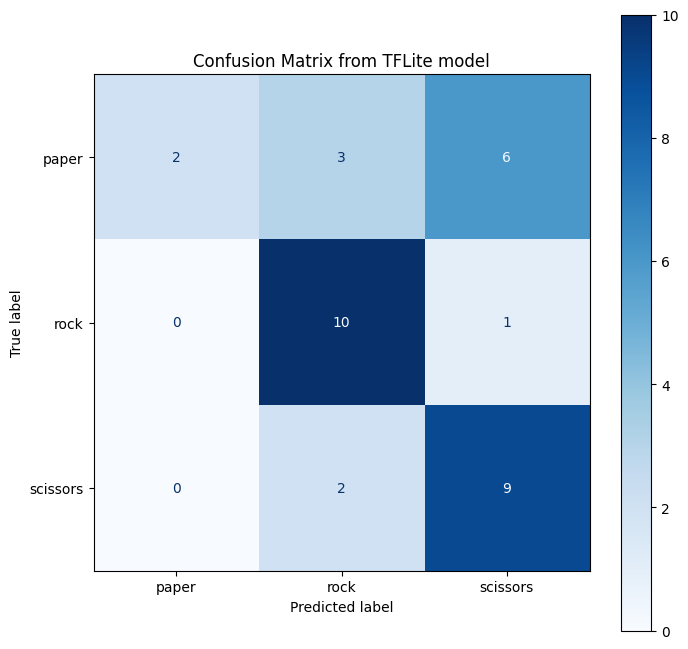

Confusion matrix:
[[ 2  3  6]
 [ 0 10  1]
 [ 0  2  9]]
classification_report:
              precision    recall  f1-score   support

       paper       1.00      0.18      0.31        11
        rock       0.67      0.91      0.77        11
    scissors       0.56      0.82      0.67        11

    accuracy                           0.64        33
   macro avg       0.74      0.64      0.58        33
weighted avg       0.74      0.64      0.58        33



In [ ]:
# Evaluate the tflite model

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_scale, input_zero_point = input_details[0]['quantization']
output_scale, output_zero_point = output_details[0]['quantization']


print("Input scale:", input_scale, "Input zero point:", input_zero_point)
print("Output scale:", output_scale, "Output zero point:", output_zero_point)


y_true = []
y_pred = []

for i in range(len(test_data)):

    x_batch, y_batch = test_data[i]

    for img, label in zip(x_batch, y_batch):
        # Step 1: Resize the image to (128, 128)
        img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)).numpy()

        # Step 2: Ensure single channel (grayscale)
        if img.ndim == 2:
            img = np.expand_dims(img, axis=-1)
        
        # Step 3: Quantize the image using the scale and zero point
        img_quant = (img / input_scale) + input_zero_point
        img_quant = np.clip(img_quant, 0, 255).astype(np.int8)

        # Step 4: Add batch dimension
        input_tensor = np.expand_dims(img_quant, axis=0)

        # Step 5: Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_tensor)

        # Step 6: Invoke the interpreter
        interpreter.invoke()

        # Step 7: Get the output tensor
        output = interpreter.get_tensor(output_details[0]['index'])

        # Step 8: Dequantize the output tensor
        output = output_scale * (output.astype(np.float32) - output_zero_point)

        # Step 9: Get the predicted class
        pred_label = np.argmax(output)
        true_label = np.argmax(label)

        y_true.append(true_label)
        y_pred.append(pred_label)


# Evaluate the tflite model
class_names = list(test_data.class_indices.keys())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(class_names)))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix from TFLite model')
plt.show()

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Print the classification report
report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0)
print("classification_report:")
print(report)

In [27]:
from tabulate import tabulate

def print_tensor_details(details, tensor_type):
    print(f"{tensor_type} Tensor Details:\n")

    # Prepare table data
    table = []
    for detail in details:
        name = detail['name']
        shape = str(detail['shape'])
        dtype = str(detail['dtype']).replace("<class 'numpy.", "").replace("'>", "")
        scale, zero_point = detail['quantization']
        table.append([name, shape, dtype, scale, zero_point])

    headers = ["Name", "Shape", "Dtype", "Scale", "Zero Point"]
    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))
    print()


In [28]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("=== Model Format Details ===\n")
print_tensor_details(input_details, "Input")
print_tensor_details(output_details, "Output")
print("============================\n")

=== Model Format Details ===

Input Tensor Details:

╒═══════════════════════════════════╤═══════════════╤═════════╤════════════╤══════════════╕
│ Name                              │ Shape         │ Dtype   │      Scale │   Zero Point │
╞═══════════════════════════════════╪═══════════════╪═════════╪════════════╪══════════════╡
│ serving_default_keras_tensor_40:0 │ [ 1 96 96  1] │ int8    │ 0.00392157 │         -128 │
╘═══════════════════════════════════╧═══════════════╧═════════╧════════════╧══════════════╛

Output Tensor Details:

╒═════════════════════════════╤═════════╤═════════╤════════════╤══════════════╕
│ Name                        │ Shape   │ Dtype   │      Scale │   Zero Point │
╞═════════════════════════════╪═════════╪═════════╪════════════╪══════════════╡
│ StatefulPartitionedCall_1:0 │ [1 3]   │ int8    │ 0.00390625 │         -128 │
╘═════════════════════════════╧═════════╧═════════╧════════════╧══════════════╛




# Conclusions 

In this practice, it was demonstrated how to convert a model from scratch into a final, useful application using TensorFlow Lite Micro. This notebook presents the complete workflow by applying previously acquired knowledge from past practices. The selected model in this case was designed to classify hand gestures for the rock-paper-scissors game.

The creation of the model involved a simple convolutional neural network (CNN) architecture tailored for image classification using grayscale images of size (IMG_SIZE, IMG_SIZE, 1). The model consists of:

1.  An input layer that accepts 2D grayscale images.

2. Two consecutive pairs of Conv2D and MaxPooling2D layers. Each Conv2D layer applies 8 filters of size (3,3) with ReLU activation to extract spatial features such as edges or textures, while the MaxPooling2D layers reduce spatial dimensions to help minimize overfitting and computational cost.

3. A Flatten layer to convert the 2D feature maps into a 1D vector.

4. A Dense layer with 32 neurons and ReLU activation to learn complex patterns.

5. A final Dense layer with 3 output neurons and softmax activation to produce a probability distribution over the three classes (rock, paper, scissors).

Once trained, the model was converted to TensorFlow Lite and subsequently to TensorFlow Lite Micro format to run efficiently on low-resource embedded systems such as microcontrollers. This practice demonstrated the full pipeline—from designing a model from scratch to deploying it as a real-time embedded application.

A comparison between the original and converted models revealed that the TensorFlow model achieved an accuracy of 79%, with balanced precision and recall across all three classes. However, after conversion, the TensorFlow Lite model's accuracy dropped to 64%, with a significant decrease in performance when classifying the "paper" gesture.

Despite this, the TFLite model maintained a high recall for "rock" and "scissors", demonstrating that even simple models can be effectively adapted to embedded environments, with acceptable trade-offs in accuracy for the benefit of lightweight deployment.